### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Importing dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [18]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [19]:
data.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [21]:
data.shape

(3999, 11)

In [23]:
data.isnull().sum().sum()

0

In [24]:
data.duplicated().sum()

1

In [25]:
data[data.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3393,1000,0,1,1,1,0,0,0,0,1597,0
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [27]:
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


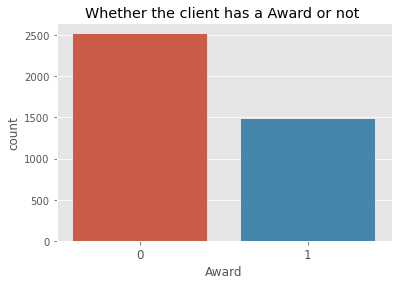

In [28]:
sns.countplot(x='Award', data=data, 
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ');

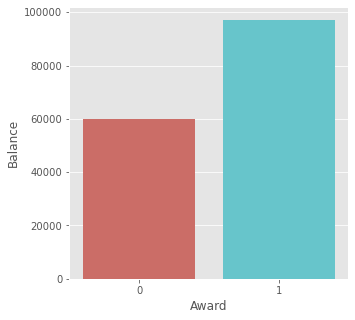

In [30]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance, ci=False, palette='hls')
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.show()

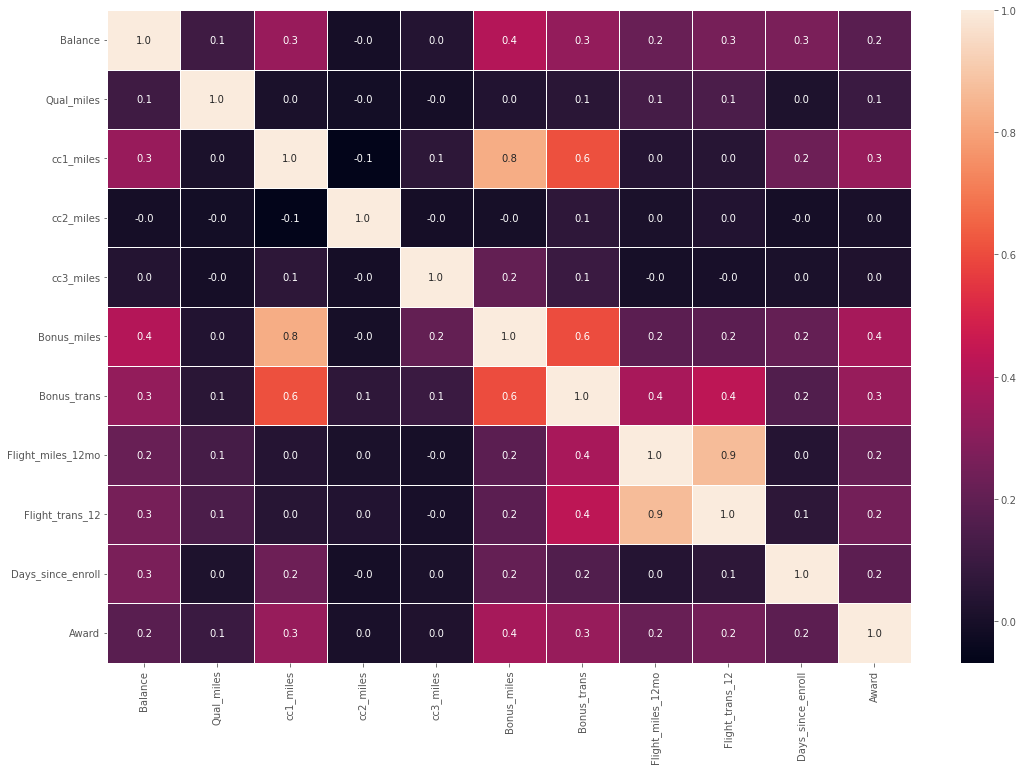

In [31]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Unique points in this correlation matrix:

flight_trans_12 is positively correlated with flight_miles_12mo

bonus_trans is positively correlated with cc1_miles

bonus_trans is positively correlated with bonus_miles

bonus_miles is positively correlated with cc1_miles

In other words, the following are positively correlated

Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months

Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions

Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions

Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

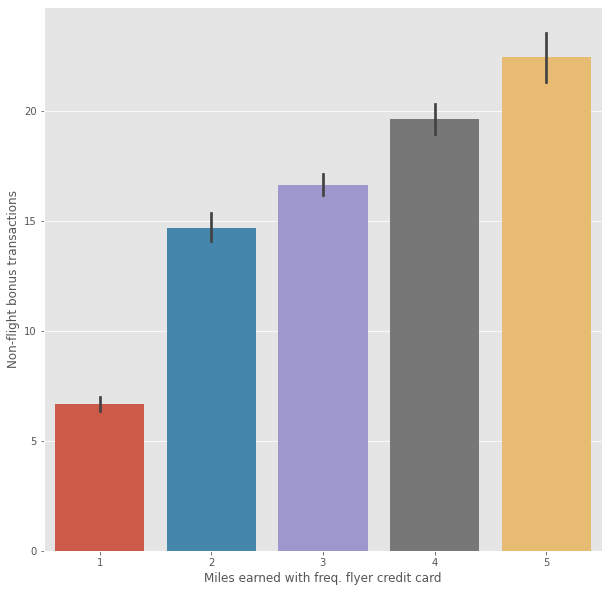

In [32]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.show()

## <font color='purple'><b>Hierarchical Clustering :

### <font color='green'><b>Feature Scaling :

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(data)
df_minmax = pd.DataFrame(df_minmax, columns=data.columns)
df_minmax.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [35]:
df_minmax.describe().round(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000
mean,0.043,0.013,0.265,0.007,0.003,0.065,0.135,0.015,0.026,0.496,0.370
std,0.059,0.069,0.344,0.074,0.049,0.092,0.112,0.045,0.072,0.249,0.483
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.011,0.000,0.000,0.000,0.000,0.005,0.035,0.000,0.000,0.281,0.000
50%,0.025,0.000,0.000,0.000,0.000,0.027,0.140,0.000,0.000,0.494,0.000
75%,0.054,0.000,0.500,0.000,0.000,0.090,0.198,0.010,0.019,0.698,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### <font color='cyan'><b>To find the number of clusters :

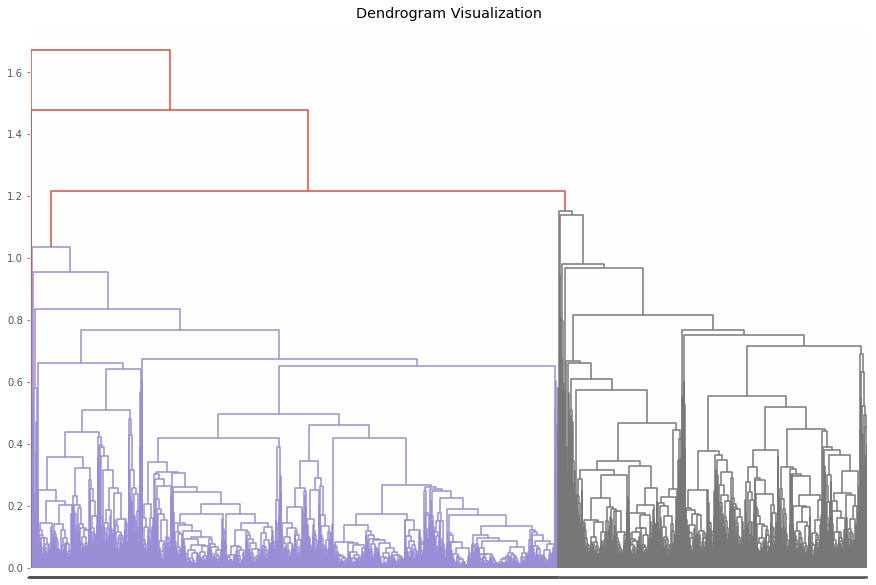

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
link = linkage(df_minmax, method='average')
plt.figure(figsize=(15, 10))
dendrogram(link, labels=data['Award'].values)
plt.title('Dendrogram Visualization');

<font color='peach'><b>There seems to be two clusters so let n_clusters = 2 .

### <font color='orange'><b>Agglomerative Clustering :

In [37]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')

In [39]:
# get the cluster labels using fit_predict method of the agglo object
labels = agglo.fit_predict(df_minmax)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
# add cluster labels to the dataset
df_h = data.copy()
df_h['cluster_labels'] = labels
df_h.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [60]:
df_h.groupby('cluster_labels').mean().round(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_labels,,,,,,,,,,,
0,73542.86,143.91,2.06,1.01,1.01,17096.30,11.54,440.53,1.33,4120.48,0.37
1,131999.50,347.00,2.50,1.00,1.00,65634.25,69.25,19960.00,49.25,2200.25,1.00


<font color='peach'><b>cluster 1 defines the group of fliers that earn the most out of the card and are frequent fliers.
<font color='peach'><b>cluster 0 defines the group of fliers that earn the least and are the least frequent fliers.

## <font color='purple'><b>K-Means Clustering :

### <font color='green'><b>Feature Scaling :

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(data)
df_std = pd.DataFrame(df_std, columns=data.columns)
df_std.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


### <font color='cyan'><b>Finding optimum number of clusters using Elbow method :

In [49]:
from sklearn.cluster import KMeans
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_std)
    wss.append(kmeans.inertia_)

In [50]:
wss

[43988.999999999985,
 35409.516629861304,
 30899.21640879058,
 27162.166106124132,
 23707.163884815593,
 21089.75687002387,
 19166.38904378935,
 17316.725861419516,
 15960.406001471114,
 14732.22988234744]

### <font color='lightgreen'><b>Elbow curve :

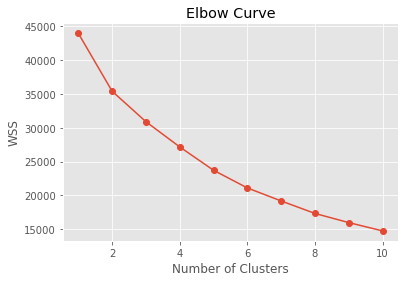

In [51]:
plt.plot(range(1,11), wss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS');

### <font color='hotpink'><b>Silhouette Score :

In [52]:
ss = []
from sklearn.metrics import silhouette_score
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_std)
    ss.append(silhouette_score(df_std, km.labels_))

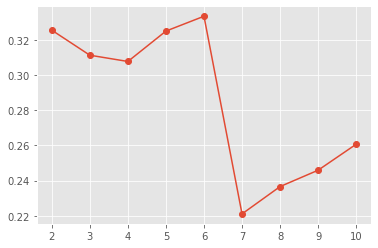

In [53]:
plt.plot(range(2,11), ss, marker='o');

<font color='peach'><b>From both the graphs the number of clusters can be taken as 2.

### <font color='cyan'><b>K-Means Clustering with k=2 :

In [54]:
km2 = KMeans(n_clusters=2, random_state=42)
km2.fit(df_std)

KMeans(n_clusters=2, random_state=42)

In [55]:
# add labels to the original dataset as a new column
labels = km2.labels_
labels

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
df_k = df.copy()
df_k['k_cluster_labels'] = labels
df_k.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_cluster_labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [59]:
# cluster profiles
df_k.groupby('k_cluster_labels').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
k_cluster_labels,,,,,,,,,,,
0,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909
1,45041.650352,89.232481,1.310716,1.016685,1.000371,5421.404894,7.363737,215.211346,0.635521,3720.834631,0.206897


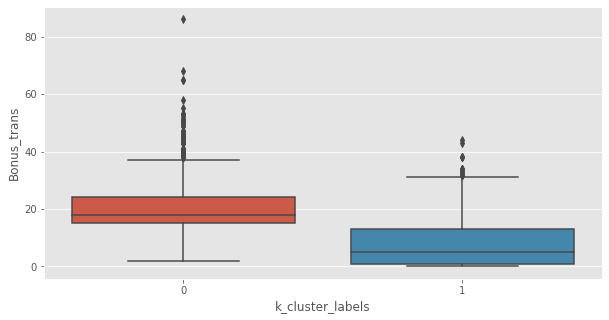

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(x='k_cluster_labels', y='Bonus_trans', data=df_k);

## <font color='purple'><b>DBSCAN :

In [62]:
from sklearn.cluster import DBSCAN

### <font color='cyan'><b>To find Epsilon value :

In [64]:
from sklearn.neighbors import NearestNeighbors

In [65]:
df_std1 = df_std.copy()
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(df_std1)
distances, indices = neighbors_fit.kneighbors(df_std1)

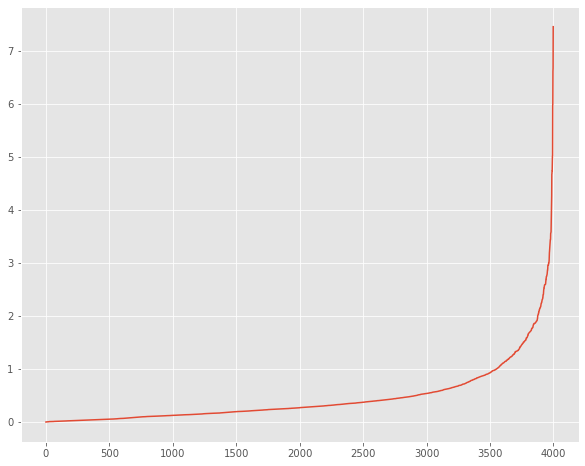

In [66]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

<font color='peach'><b>From the plot the point where knee occurs is approx. 1.00.

In [94]:
min_samples = range(20,21)
eps = np.arange(1.0,1.5,2.0)

In [95]:
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(df_std1).labels_
        score = silhouette_score(df_std1, labels)
        output.append((ms, ep, score))

In [96]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.21237566172659525
min_samples: 20
eps: 1.0


### <font color='cyan'><b>DBSCAN with epsilon=1.00 and min_samples=20 :

In [67]:
from collections import Counter

In [98]:
labels = DBSCAN(min_samples=min_samples, eps = 1.0).fit(df_std1).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(df_std1, labels)}")

Number of clusters: 3
Number of outliers: 775
Silhouette_score: 0.21237566172659525


In [87]:
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [88]:
df_db = df.copy()
df_db['dbscan_labels'] = labels
df_db.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,dbscan_labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


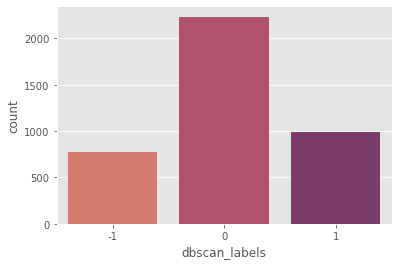

In [89]:
sns.countplot(x='dbscan_labels',data=df_db,palette='flare');

<font color='peach'><b>cluster 0 has higher number of passengers and also more awards.